# Part 2 - Régularisation de problèmes mal posés

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Préambule

### Un problème mal posé ?

Qu'est-ce-qu'un problème mal posé ? Pour commencer, nous allons définir qu'est ce qu'un problème bien posé. Un problème ($P$) bien posé dit respecter les 3 conditions suivantes:
* Une solution au problème $P$ existe
* La solution est unique
* La solution dépend continuellement de la donnée

Un problème mal posé est un problème ($P$) qui ne respecte pas une des conditions situées au dessus. Il est donc difficile de trouver une solution aux problèmes mal posés avec les méthodes vues auparavant. Pour trouver une solution optimale à ce type de problème nous allons utiliser la méthode analytique des moindres carrés.
Nous utiliserons aussi les méthodes de régularisation telles que LASSO ou Tikhonov.

## Question 2.9
---

### Principe

Le but de la résolution de la méthode analytique des moindres de carrés est de pouvoir trouver une solution permettant de trouver une relation entre des groupes différents en ajoutant de l'information dans ces données.[BV04]

Plus en détails, on recherche le vecteur $y \in \mathbb{R}^N$ qui contient les éléments {$y_1, y_2, ..., y_n$} où $y_i \in R$. Le vecteur $y$ résulte d'une corrélation des données de la matrice $X$ qui est une matrice $N \times P$ où $P$ représente le nombre de paramètres des éléments $x$. Nous allons en déduire $y$ à l'aide de la formule suivante:
$$
y = X\beta + \epsilon
$$

où
* $\beta$ est vecteur de paramètre qui rajoute l'information dans les données X.
* $\epsilon$ qui représente les résidus (différence entre le point et la droite $y$) aussi appeler erreur de prédiction.

On peut calculer la SSE (Sum of Squared Errors) qui représente la somme de tous les résidus.

$$
SSE(\beta) = \sum_{i}^{N}((y_i - x_i^T\beta)^2)\\
SSE(\beta) = (y - X\beta)^T(y - X\beta)\\
SSE(\beta) = ||y - X\beta||^2_2
$$

La $SSE$ va nous permettre d'appliquer des pénalités à nos données afin de trouver la solution optimale à notre problème.

Cette méthode est utiliser dans le domaine du machine learning avec notamment $\beta$ telle que les régresseurs et $\epsilon$ les erreurs de prédiction de $y$. Cette méthode va permettre de trouver la meilleure solution en ajoutant une fonction de pénalité sur le $SSE$.


## Question 2.10
---

### Préambule

Comme vu à la question 2.9, la méthode des moindres carrés permet de trouver une corrélation entre des ensembles différents. Nous avons vu la notion de $SSE$ comme étant la somme des résidus. Afin de pouvoir trouver la séparation optimale, il faut trouver un moyen de minimiser la $SSE$. Nous allons utiliser des méthodes de régularisation et de pénalité que nous allons appliquer sur la $SSE$. Au cours de cette question, nous allons présenter les méthodes de régularisation Tikhonov et de LASSO.

On rappelle la $SSE$:

$$
SSE(\beta) = ||y - X\beta||^2_2
$$

où
* $\beta$ est notre ensemble
* $y$ notre fonction objective
* $X$ les points

On définit une pénalité dans le domaine du machine learning (ML) par la minisation de la formule suivante:

$$
arg min \ Pen(\beta) = \mathcal{L}(\beta) + \lambda \Omega(x)
$$

où
* $\mathcal{L}(\beta)$ est la fonction de regression (fonction perte en ML)
* $\lambda$ est le paramètre de régularisation
* $\Omega(\beta)$ est la fonction de pénalité

Les deux méthodes présentent en dessous utilisent deux fonctions de pénalité différentes avec laquelle nous pourrons trouver le vecteur $\beta$ le plus optimal possible à notre problème.

### Les méthodes
#### Tikhonov

Tikhonov (de son vrai non Andreï Nikolaïevitch Tikhonov) est un mathématicien russe. Il est connu pour avoir prouvé la régularisation qui porte son nom. Le but de cette régularisation est d'appliquer une régularisation $\mathcal{L}_2$ comme fonction de pénalité. Cette régularisation s'appelle aussi Ridge[TiK43].

$$
Ridge(\beta) = ||y-X\beta||^{2}_{2} - \lambda ||\beta||^2_2
$$

Afin de pouvoir trouver le $\beta$ minimal, il suffit de résoudre:

$$
\frac{\partial{Ridge}}{\partial{\beta}} = 0
$$

Ce qui nous donne:

$$
\iff\frac{\partial{}}{\partial{\beta}} ((y - X\beta)^T(y - X\beta) + \lambda\beta^T\beta) = 0\\
\iff\frac{\partial{}}{\partial{\beta}} (y^Ty - 2\beta^TX^Ty + \beta^TX^X\beta + \lambda\beta^T\beta) = 0\\
\iff -2X^Ty + 2X^TX\beta + 2\lambda\beta = 0\\
\iff -X^Ty + (X^TX + \lambda)\beta = 0\\
\iff \beta = \frac{X^Ty}{X^TX + \lambda}
$$

#### LASSO

La méthode régularisation de LASSO permet d'appliquer une pénalité $||\beta||_1$ à la méthode de régularisation ce qui donne:


$$
LASSO(\beta) =||y-X\beta||^{2}_{2} + \lambda||\beta||_1
$$

La fonction de pénalité est une régularisation $\mathcal{L}_1$[Tib96]. Cette méthode permet notamment de forcer les paramètres de $\beta$ à être à 0 pour une meilleure régression.

L'avantage d'utiliser la régularisation de LASSO est de l'utiliser dans le cas où $N < P$. La régularisation $\mathcal{L}_1$ s'adapte mieux que la régularisation $\mathcal{L}_2$ sur ce type de données. Hors il n'est pas adapté dans le cadre de fortes corrélations entre les variables ou si $P$ est très grand par rapport à $n$.


Nous pouvons faire utiliser les deux régularisation en même temps en utilisant Elsatic NET[Hui03].

## Réferences des questions 2.9 et 2.10
---

[^BV04] **Convex Optimization.**
        Stephen Boyd and Lieven Vandenberghe.
        *Cambridge University Press, New York, NY, USA* 2004.

[^TiK43] **On the stability of inverse problems**
    A. N. Tikhonov
    *Doklady Akademii Nauk SSSR* vol. 39, no. 5, pp. 195–198, 1943.

[^Tib96] **Regression shrinkage and selectionvia the lasso.**
        R. Tibshirani.
        *Journal ofthe Royal Statistical Society* Series B, 58(1):267–288, 1996.
        
[^Hui03] **Regularization and Variable Selection via theElastic Net**
    Hui Zou and Trevor Hastie
    *Department of Statistics, Stanford University*, 2003

## Question 2.11
---

ci-dessous la classe qui permet d'utiliser la méthode des moindres carrées

In [6]:
class least_square:
    def __init__(self, X):
        """Constructor of the least_square.
           
           Parameter
           ---------
               X: A numpy array
                   Represents a matrix N x P which
                   N is the length of element and P number of features
        """
        self.X = X
        self.beta = np.zeros(X.shape[1])
        self.eps = np.random.randn(X.shape[0])
        self.y = self.X.dot(self.beta) + self.eps 
        for i in range(self.y.shape[0]):
            r = (self.y[i] - self.beta.dot(self.X[i,:]))
            self.eps[i] = r**2
        
        self.SSE = []
        self.max_iter = 0
        
       
    def compute_SSE(self):
        """Compute the SSE of the model.
           
           Return:
           -------
               integer which represents the SSE of the model.
        """
        return np.linalg.norm(self.y - self.X.dot(self.beta), ord=2)**2


    def tikhonov_reg(self, alpha, y, max_iter=10):
        """Constructor of the least_square.
           
           Parameters
           ----------
               alpha: float
                   Represents the regularisation paramter (lambda)
               y: vector
                   Reference of the matrix X
               max_iter: int
                   Set the maximum of iteration (default: 10)
            Return:
            -------
                the prediction
        """
        iteration = 0
        self.max_iter = max_iter
        while iteration < max_iter:
            self.y = np.dot(self.X, self.beta)
            self.eps = self.y - y
            self.beta = np.linalg.inv(np.transpose(self.X).dot(self.X) + np.identity(self.X.shape[1]) * alpha).dot(np.transpose(self.X).dot(self.eps))
            if iteration < 5 or iteration >= max_iter - 5:
                print("epoch: %d/%d" % (iteration + 1, max_iter))
                print("SSE = %f" % self.compute_SSE())
            elif iteration == 5:
                print()
                print("...")
                print()
            self.SSE.append(self.compute_SSE())
            iteration += 1
        return self.y
    
    def plot(self, y_ref):
        """Plot the result of regularisation.
        
           Parameter
           ---------
               y_ref: vector of float
                   Represents the y reference of X to plot it
        """
        fig = plt.figure(figsize=(21, 6))
        ax = fig.add_subplot(121)
        ax.set_title("Evolution of the SSE")
        plt.xlabel("epochs")
        plt.ylabel("SSE")
        ax.plot(np.arange(1,self.max_iter+1), self.SSE, c='green', label='SSE')
        leg = ax.legend()
        
        ax = fig.add_subplot(122)
        ax.set_title("")
        plt.xlabel("X")
        plt.ylabel("Y")
        ax.scatter(self.X[:,0], y_ref, c='red', marker='o', label='y reference')
        print(self.X.shape)
        if self.X.shape[1] == 1:
            ax.plot(self.X[:,0], self.y, c='green', label='y pred')
        else:
            ax.scatter(self.X[:,0], self.y, c='green', marker='x', label='y pred')
        leg = ax.legend()

epoch: 1/100
SSE = 0.083854
epoch: 2/100
SSE = 0.083673
epoch: 3/100
SSE = 0.083493
epoch: 4/100
SSE = 0.083312
epoch: 5/100
SSE = 0.083132

...

epoch: 96/100
SSE = 0.068287
epoch: 97/100
SSE = 0.068139
epoch: 98/100
SSE = 0.067992
epoch: 99/100
SSE = 0.067845
epoch: 100/100
SSE = 0.067699
(100, 1)


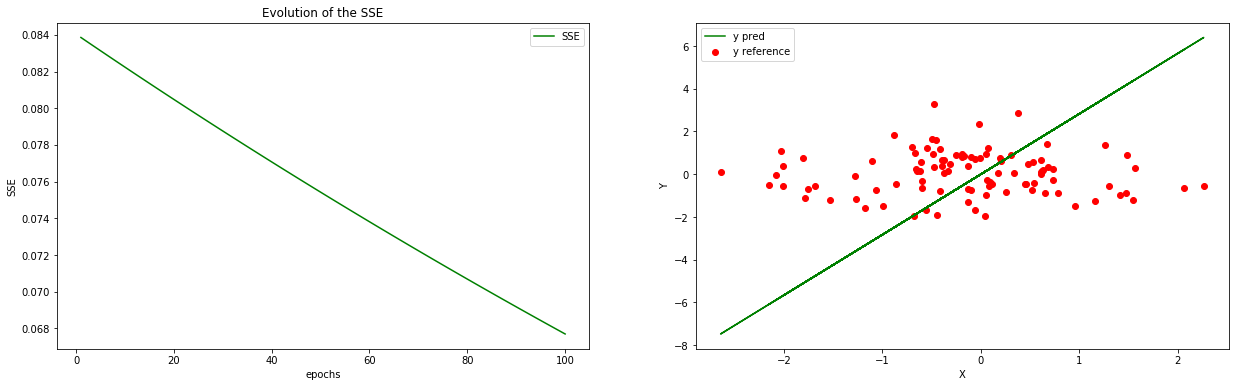

In [7]:
n_features = 1   # = P (number of features)
n_samples = 100  # = N (number of elements)


# Create dataset
X = np.random.randn(n_samples, n_features)
Y = np.random.randn(n_samples)

# Create the least_square and doing a L2 regression
l = least_square(X)
l.tikhonov_reg(0.1, y=Y, max_iter=100)


# plot results
l.plot(Y)

On observe que la SSE diminue au long des epochs. Le deuxième plot nous montre la droite qui sépare nos deux éléments, cela nous permet d'avoir l'hyperplan d'appui pour nos éléments.